### Analysis of Credit Card Data Using KMeans Clustering Algorithm
Banks and other financial institutions have many credit card customers. They frequently receive new applications for credit cards regardless. The use of credit cards is different from customer-to-customer. 

In this project, we analyze data on customers behavior with respect to their credit card usage. Since we are not doing predictive modeling (or supervised machine learning), we employ KMeans clustering algorithm (an unsupervised machine learning model) to discover natural groupings (clusters) in feature space of the data with respect to some features. This helps us to discover patterns or knowledge in the data. 

In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
%matplotlib inline

In [113]:
ccdata = pd.read_csv("CCC.csv", sep = ",")
ccdata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [114]:
ccdata.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [115]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### Data PreProcessing and Cleaning
Before implementing the KMEANS clustering algorithm, we preprocess the data (especially the Customer_ID) which contains string objects. We convert the string object to numberic objects. We'll use the label encoding in SKLearn library to perform this task. We also observe that some of the features have missing values (NAs) and will be cleaned as well by imputing them with mean values. 

In [116]:
from sklearn.preprocessing import LabelEncoder
LabEnc = LabelEncoder()
for i in ccdata:
    if ccdata[i].dtypes == "object":
        LabEnc.fit(ccdata[i])
        ccdata[i] = LabEnc.transform(ccdata[i])

In [117]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### Treatment of NAs 

In [118]:
def missingVals(ccdata):
    missingVal = ccdata.isnull().sum().sort_values(ascending=False)
    num_NAs = ccdata.isnull().sum() / ccdata.isnull().count() * 100
    percent_NAs = (round(num_NAs, 1)).sort_values(ascending=False)
    NA_data = pd.concat([missingVal, percent_NAs], axis=1, keys=['Total', 'Percent(%)'])
    print(NA_data)

In [119]:
missingVals(ccdata)

                                  Total  Percent(%)
MINIMUM_PAYMENTS                    313         3.5
CREDIT_LIMIT                          1         0.0
CUST_ID                               0         0.0
BALANCE                               0         0.0
PRC_FULL_PAYMENT                      0         0.0
PAYMENTS                              0         0.0
PURCHASES_TRX                         0         0.0
CASH_ADVANCE_TRX                      0         0.0
CASH_ADVANCE_FREQUENCY                0         0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0         0.0
ONEOFF_PURCHASES_FREQUENCY            0         0.0
PURCHASES_FREQUENCY                   0         0.0
CASH_ADVANCE                          0         0.0
INSTALLMENTS_PURCHASES                0         0.0
ONEOFF_PURCHASES                      0         0.0
PURCHASES                             0         0.0
BALANCE_FREQUENCY                     0         0.0
TENURE                                0         0.0


Having identified missing values (NAs) in our dataset, we go a step further to impute NAs with means of the corresponding features namely MINIMUM_PAYMENTS and CREDIT_LIMIT.

In [120]:
ccdata["MINIMUM_PAYMENTS"] = ccdata["MINIMUM_PAYMENTS"].fillna(ccdata["MINIMUM_PAYMENTS"].mean())

In [121]:
ccdata["CREDIT_LIMIT"] = ccdata["CREDIT_LIMIT"].fillna(ccdata["CREDIT_LIMIT"].mean())

##### Treatment of Outliers
In this section, we utilize lower, upper and interquartile ranges to identify outliers and treat them accordingly. Because, we have already imputed NAs with means, we will remove the outliers present in the corresponding features.

In [122]:
def Outliers(ccdata, i): 
    
    sorted(ccdata[i])
    
    LQ = ccdata[i].quantile(0.25)
    UQ = ccdata[i].quantile(0.75)
    IQR = UQ - LQ
    
    maximum = (UQ + (1.5 * IQR))
    minimum = (LQ - (1.5 * IQR))
    
    count = len(ccdata[(ccdata[i] > maximum) | (ccdata[i] < minimum)])
    ccdata.drop(ccdata[(ccdata[i] > maximum) | (ccdata[i] < minimum)].index, inplace=True)
    
    print("Number of Outliers Removed:", count)

In [123]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### KMeans Clustering

Before generating a scatter plot to show the clustering between BALANCE and MINIMUM_PAYMENTS of the customers, we rescale the 2 features to good plot. Scatter plots of clustering results can be misleading when the data are not scaled properly.

In [124]:
scale = MinMaxScaler()
scale.fit(ccdata[['BALANCE', 'MINIMUM_PAYMENTS']])
ccdata[['BALANCE', 'MINIMUM_PAYMENTS']] = scale.transform(ccdata[['BALANCE', 'MINIMUM_PAYMENTS']])
ccdata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,0.002148,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.001826,0.000000,12
1,1,0.168169,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.014034,0.222222,12
2,2,0.131026,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.008210,0.000000,12
3,3,0.087521,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.011310,0.000000,12
4,4,0.042940,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.003204,0.000000,12


#### ELBOW PLOT
Since our data has several features, we utilize the Elbow method to find the optimal value of k (unique clusters). We observe that the elbow is at 3. Thus, we have 3 unique clusters available in our data w.r.t BALANCE & MINIMUM PAYMENTS. 

In [125]:
k_range = range(1,10)
SSE = []
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(ccdata[['BALANCE', 'MINIMUM_PAYMENTS']])
    SSE.append(km.inertia_)

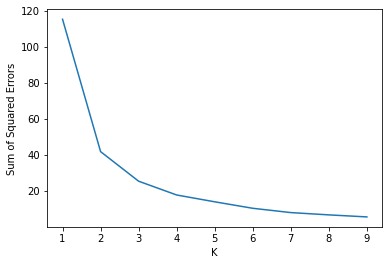

In [126]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_range, SSE)

The elbow graph above indicates number of clusters k=3.

In [127]:
kmmodel = KMeans(n_clusters = 3, random_state = 0)
y_pred = kmmodel.fit_predict(ccdata[['BALANCE', 'MINIMUM_PAYMENTS']])
y_pred

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [128]:
ccdata['cluster'] = y_pred
ccdata.cluster

0       0
1       2
2       2
3       0
4       0
       ..
8945    0
8946    0
8947    0
8948    0
8949    0
Name: cluster, Length: 8950, dtype: int32

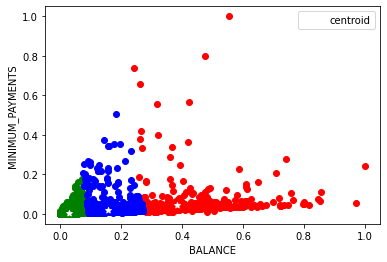

In [129]:
c0 = ccdata[ccdata.cluster == 0]
c1 = ccdata[ccdata.cluster == 1]
c2 = ccdata[ccdata.cluster == 2]

plt.scatter(c0['BALANCE'], c0['MINIMUM_PAYMENTS'], color = 'green')
plt.scatter(c1['BALANCE'], c1['MINIMUM_PAYMENTS'], color = 'red')
plt.scatter(c2['BALANCE'], c2['MINIMUM_PAYMENTS'], color = 'blue')

plt.scatter(kmmodel.cluster_centers_[:, 0], kmmodel.cluster_centers_[:, 1], 
            color = 'white', marker = '*', label = 'centroid')

plt.xlabel('BALANCE')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()

In [130]:
ASC = silhouette_score(ccdata[['BALANCE', 'MINIMUM_PAYMENTS']], labels = kmmodel.labels_)
print("Average Silhouette Coefficient for AGG: ", ASC)

Average Silhouette Coefficient for AGG:  0.6363226412175987


The value of the Average Silhouette Coefﬁcient is between [-1, 1], where a score of 1 denotes the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters. With an ASC of 0.64 > 0, we observe a good level of structure indicating good clustering.